### Conceitos de Logica Fuzzy para calssificação de querogênio

In [14]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

In [15]:
custom_style = {
    'figure.figsize': (8, 6),
    'font.family':'sans-serif',
    'axes.facecolor': 'lightgray',
    'figure.facecolor':'silver',
    'scatter.marker': 'o',
    'font.size': 9,
    'axes.grid': True
    }

#### Faixas de Valores:

* Tipo I: {IH > 600} ___ {S1/S3 > 15}
* Tipo II: {IH > 300 and IH <= 600} ___ {S1/S3 > 10 and S1/S3 <15}
* Tipo II/III: {IH > 200 and IH <=300} ___ {S1/S3 > 5 and S1/S3 < 10]
* Tipo III: {IH > 50 and IH <= 200} ___ {S1/S3 > 1 and S1/S3 < 5}
* Tipo IV: {IH <= 50} ___ {S1/S3 < 1}

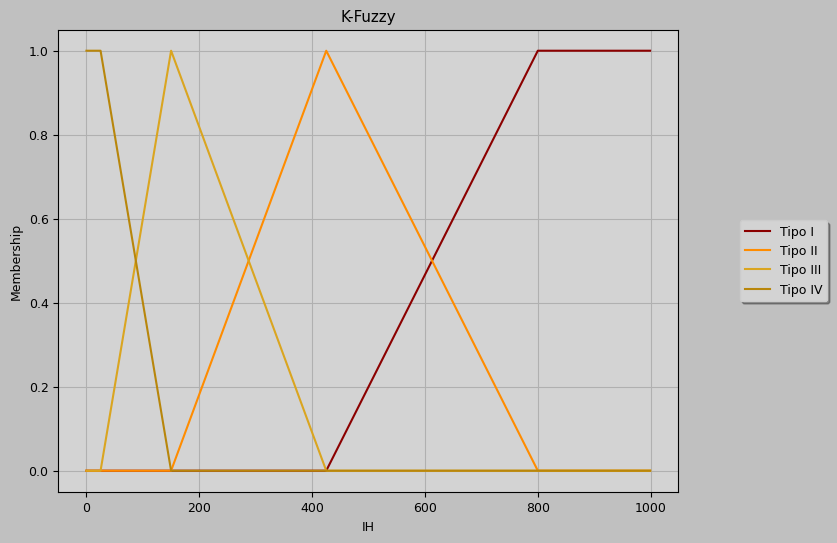

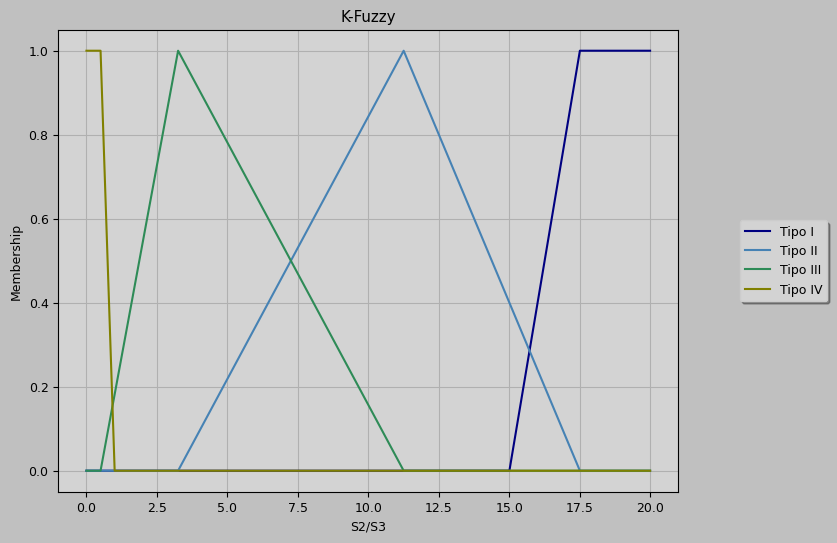

In [16]:
# Definição de funções triangulares e trapeziais 

# IH
x = np.arange(0, 1000, 1)
Tipo_I = fuzz.trapmf(x, [425, 800, 1000, 1000])
Tipo_II  = fuzz.trimf(x, [150, 425, 800])
Tipo_III = fuzz.trimf(x, [25, 150, 425])
Tipo_IV  = fuzz.trapmf(x, [0,0, 25, 150])
#Plotting 
plt.figure()
plt.plot(x, Tipo_I, linewidth=1.5, label='Tipo I', c="darkred")
plt.plot(x, Tipo_II, linewidth=1.5, label='Tipo II',c="darkorange")
plt.plot(x, Tipo_III, linewidth=1.5, label='Tipo III',c="goldenrod")
plt.plot(x, Tipo_IV, linewidth=1.5, label='Tipo IV',c="darkgoldenrod")
plt.title('K-Fuzzy')
plt.ylabel('Membership')
plt.xlabel("IH")
plt.style.use(custom_style)
plt.legend(loc='center right', bbox_to_anchor=(1.25, 0.5),
ncol=1, fancybox=True, shadow=True)

# S2/S3
y = np.arange(0, 20, 0.01)
Tipo_I = fuzz.trapmf(y, [15, 17.5, 20, 20])
Tipo_II  = fuzz.trimf(y, [3.25, 11.25, 17.5])
Tipo_III = fuzz.trimf(y, [0.5, 3.25, 11.25])
Tipo_IV  = fuzz.trapmf(y, [0,0, 0.5, 1])
#Plotting 
plt.figure()
plt.plot(y, Tipo_I, linewidth=1.5, label='Tipo I', c="navy")
plt.plot(y, Tipo_II, linewidth=1.5, label='Tipo II',c="steelblue")
plt.plot(y, Tipo_III, linewidth=1.5, label='Tipo III',c="seagreen")
plt.plot(y, Tipo_IV, linewidth=1.5, label='Tipo IV',c="olive")
plt.title('K-Fuzzy')
plt.ylabel('Membership')
plt.xlabel("S2/S3")
plt.style.use(custom_style)
plt.legend(loc='center right', bbox_to_anchor=(1.25, 0.5),
ncol=1, fancybox=True, shadow=True)


#### Fuzzy c-means clustering

In [ ]:
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
import pandas as pd

colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

# Define three cluster centers
centers = [[17.5,800],
           [11.25,425],
           [3.25,150],
           [0.5,25]]

# Define three cluster sigmas in x and y, respectively
sigmas = [[8, 3],
          [3, 5],
          [11, 7]]

# Generate test data
df = pd.read_csv("Poços_Marinho/1-ALS-1-AL.csv")
df["S2/S3"]=df["S2"]/df["S3"]
df_fuz=df[["S2/S3","IH"]]
labels = np.zeros(1)

# Visualize the test data
fig0, ax0 = plt.subplots(figsize=(8, 6))
for label in range(3):
    ax0.plot(df["S2/S3"], df["IH"] , '.',
             color=colors[label])
plt.style.use(custom_style)


In [ ]:
# Set up the loop and plot
fig1, axes1 = plt.subplots(2,1,figsize=(8, 6))
xpts = df_fuz["S2/S3"]
ypts = df_fuz["IH"]
alldata = np.vstack((xpts, ypts))
fpcs = []

for ncenters, ax in enumerate():
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        alldata, ncenters, 2, error=0.005, maxiter=1000, init=None)

    # Store fpc values for later
    fpcs.append(fpc)

    # Plot assigned clusters, for each data point in training set
    cluster_membership = np.argmax(u, axis=0)
    for j in range(ncenters):
        ax.plot(xpts[cluster_membership == j],
                ypts[cluster_membership == j], '.', color=colors[j])

    # Mark the center of each fuzzy cluster
    for pt in cntr:
        ax.plot(pt[0], pt[1], 'rs')

    ax.set_title('Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc))
    ax.axis('off')

fig1.tight_layout()

### Distância Euclidiana em 2D

#### Faixas de Valores:

* Tipo I: {IH > 600} ___ {S1/S3 > 15}
* Tipo II: {IH > 300 and IH <= 600} ___ {S1/S3 > 10 and S1/S3 <15}
* Tipo II/III: {IH > 200 and IH <=300} ___ {S1/S3 > 5 and S1/S3 < 10]
* Tipo III: {IH > 50 and IH <= 200} ___ {S1/S3 > 1 and S1/S3 < 5}
* Tipo IV: {IH <= 50} ___ {S1/S3 < 1}

#### Definição de centróides

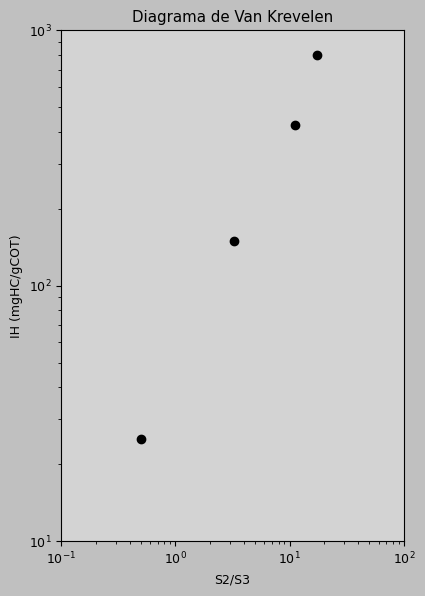

In [67]:
# Figura com tamanho A4

a4_width = 4.135  # inches
a4_height = 5.845  # inches

fig= plt.figure(figsize=(a4_width, a4_height), layout='constrained')
ax=fig.add_subplot()

aIH=(800,425,150,25)
S=(17.5,11.25,3.25,0.5)
ax.scatter(S,IH, c="black")
#ax.add_patch(patches.Rectangle((15,600),400,500, linewidth=1, edgecolor='black', facecolor='none', linestyle="--")) # Tipo 1
#ax.add_patch(patches.Rectangle((10,300),5,300, linewidth=1, edgecolor='black', facecolor='none', linestyle="--")) # Tipo II
#ax.add_patch(patches.Rectangle((5,200),5,100, linewidth=1, edgecolor='black', facecolor='none', linestyle="--")) # Tipo II/III
#ax.add_patch(patches.Rectangle((1,50),4,150, linewidth=1, edgecolor='black', facecolor='none', linestyle="--")) # Tipo III
#ax.add_patch(patches.Rectangle((0,0),1,50, linewidth=1, edgecolor='black', facecolor='none', linestyle="--"))  # Tipo IV
#ax.text(35,750, "I", fontsize=12)
#ax.text(11.3,390, "II", fontsize=12)
#ax.text(5.0,230, "II/III", fontsize=12)
#ax.text(2.0,100, "III", fontsize=12)
#ax.text(0.27,22, "IV", fontsize=12)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim(0.1,100)
ax.set_ylim(10,1000)
ax.set_xlabel("S2/S3")
ax.set_ylabel("IH (mgHC/gCOT)")
ax.set_title("Diagrama de Van Krevelen")
ax.grid(False)


#### Distâncias euclidianas entre centróides (BC)

In [30]:
dist12=np.sqrt(((17.5-11.25)**2+((800-425)**2)))
dist23=np.sqrt(((11.25-3.25)**2+((425-150)**2)))
dist34=np.sqrt(((3.25-0.5)**2+((150-25)**2)))
print(dist12,dist23,dist34)

375.05207971693744 275.11633902769205 125.03024634063551


#### Distâncias euclidianas entre amostra e centróides (AB e AC)

In [55]:
n1=float(input("S2/S3: "))
n2=float(input("IH: "))
dista1=np.sqrt(((n1-17.5)**2+((n2-800)**2)))
dista2=np.sqrt(((n1-11.25)**2+((n2-425)**2)))
dista3=np.sqrt(((n1-3.25)**2+((n2-150)**2)))
dista4=np.sqrt(((n1-0.5)**2+((n2-25)**2)))
print(dista1,dista2,dista3,dista4)

526.1345930463041 151.10566667071095 124.02226614604331 249.05222343918152


#### Distância entre centróide e projeção da amostra sobre a reta (BD)

In [56]:
bd1=(((dist12)**2)-((dista2)**2)+((dista1)**2))/(2*dist12)
bd2=(((dist23)**2)-((dista3)**2)+((dista2)**2))/(2*dist23)
bd3=(((dist34)**2)-((dista4)**2)+((dista3)**2))/(2*dist34)
print(bd1,bd2,bd3)

526.1252654536041 151.10044044245484 -124.02169038165218


#### Cálculo de percentual sobre cada tipo de querogênio

In [57]:
pct1=(bd1/dist12)*100
pct2=(bd2/dist23)*100
pct3=(bd3/dist34)*100
print(pct1,pct2,pct3)

140.28058872535408 54.92237973813896 -99.19335041839747


#### Condicionantes sobre equação a ser utilizada e cálculo de percentual

In [59]:
df = pd.read_csv("Poços_Marinho/1-ALS-2-AL.csv")
df["S2/S3"]=df["S2"]/df["S3"]


T1 = []
T2 = []
T3 = []
T4 = []
for index, row in df.iterrows():
    i = row['IH']
    j = row['S2/S3']
    dist12=np.sqrt(((17.5-11.25)**2+((800-425)**2)))
    dist23=np.sqrt(((11.25-3.25)**2+((425-150)**2)))
    dist34=np.sqrt(((3.25-0.5)**2+((150-25)**2)))
    dista1=np.sqrt(((j-17.5)**2+((i-800)**2)))
    dista2=np.sqrt(((j-11.25)**2+((i-425)**2)))
    dista3=np.sqrt(((j-3.25)**2+((i-150)**2)))
    dista4=np.sqrt(((j-0.5)**2+((i-25)**2))) 
    bd1=(((dist12)**2)-((dista2)**2)+((dista1)**2))/(2*dist12)
    bd2=(((dist23)**2)-((dista3)**2)+((dista2)**2))/(2*dist23)
    bd3=(((dist34)**2)-((dista4)**2)+((dista3)**2))/(2*dist34)
    pct1=(bd1/dist12)*100
    pct2=(bd2/dist23)*100
    pct3=(bd3/dist34)*100
    if i >= 800:
        T1.append(100) 
        T2.append(0)
        T3.append(0)
        T4.append(0) 
    elif i >= 425 and i <=800:
        T1.append(100-pct1) 
        T2.append(pct1)
        T3.append(0)
        T4.append(0) 
    elif i >= 150 and i < 425:
        T1.append(0) 
        T2.append(100-pct2)
        T3.append(pct2)
        T4.append(0) 
    elif i>=25 and i<150:
        T1.append(0) 
        T2.append(0)
        T3.append(100-pct3)
        T4.append(pct3)
    elif i>=0 and i<25:
        T1.append(0) 
        T2.append(0)
        T3.append(0)
        T4.append(100)
    else:
        T1.append("") 
        T2.append("")
        T3.append("")
        T4.append("")

df["% Tipo I"]=T1
df["% Tipo II"]=T2
df["% Tipo III"]=T3
df["% Tipo IV"]=T4
df

,Profundidade,COT,S1,S2,S3,Tmax,Ro,IH,IO,S2/S3,% Tipo I,% Tipo II,% Tipo III,% Tipo IV
0,579.8,2.50,0.32,6.85,1.22,430.0,NaN,274.00,48.80,5.614754,0,45.077776,54.922224,0
1,597.8,2.51,0.29,7.13,1.27,429.0,NaN,284.06,50.60,5.614173,0,48.732859,51.267141,0
2,615.8,2.18,0.22,6.05,1.26,430.0,NaN,277.52,57.80,4.801587,0,46.348099,53.651901,0
3,633.8,2.06,0.26,5.28,1.10,430.0,NaN,256.31,53.40,4.800000,0,38.641877,61.358123,0
4,651.8,1.29,0.17,1.76,1.36,428.0,NaN,136.43,105.43,1.294118,0,0,89.114845,10.885155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,3285.8,0.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,,
132,3288.8,0.72,0.20,0.33,0.19,443.0,NaN,45.83,26.39,1.736842,0,0,16.677696,83.322304
133,3303.8,0.26,0.10,0.10,0.30,NaN,NaN,38.46,115.38,0.333333,0,0,10.759859,89.240141
134,3336.8,0.72,0.20,0.20,0.20,NaN,NaN,27.78,27.78,1.000000,0,0,2.23172,97.76828
